## Основы статистики
https://stepik.org/course/76/syllabus
### 2. Сравнение средних
### 2.1 T-распределение

In [9]:
from scipy import stats
import numpy as np

def get_se(sd, N):
    '''Стандартная ошибка'''
    return sd/np.sqrt(N)

def z_stat(X, M, sd, N):
    '''z-значение'''
    se = get_se(sd, N)
    return (X-M)/se

def p_value_norm(z_stat, alternative = 'two-sided'):
    '''p_value для нормального распределения'''
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [10]:
#шаги 6-9

z = z_stat(10.8, 10, 2, 25)
p_value_norm(2, 'two-sided')

0.04550026389635842

In [11]:
#шаги 6-9
#используем t-распределение

def p_value_t(t_stat, N, alternative = 'two-sided'):
    df = N-1 #кол-во степеней свободы
    if alternative == 'two-sided':
        return 2*(1-stats.t.cdf(np.abs(t_stat),df))
    if alternative == 'less':
        return stats.t.cdf(t_stat, df)
    if alternative == 'greater':
        return 1 - stats.t.cdf(t_stat, df)

p_value_t(z, 25)

0.0569398499365914

In [12]:
#шаг 10
p_value_t(-2, 15)

0.06528795288911193

### 2.2 Сравнение двух средних; t-критерий Стьюдента

In [18]:
#парный t-тест (t-критерий Стьюдента)

def t_stat(X1, X2, sd1, sd2, N1, N2):
    se = np.sqrt(sd1**2/N1+sd2**2/N2)
    return (X1-X2)/se

def p_value_t_pair(t_stat, N1, N2, alternative = 'two-sided'):
    df = N1+N2-2 #кол-во степеней свободы
    if alternative == 'two-sided':
        return 2*(1-stats.t.cdf(np.abs(t_stat),df))
    if alternative == 'less':
        return stats.t.cdf(t_stat, df)
    if alternative == 'greater':
        return 1 - stats.t.cdf(t_stat, df)

In [19]:
#шаг 12

t = t_stat(45,34,9,10,100,100)
p_value_t_pair(t, 100, 100)

3.441691376337985e-14

### 2.3  Проверка распределения на нормальность, QQ-Plot

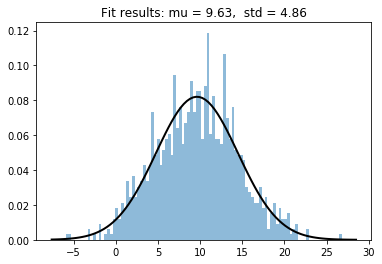

In [81]:
import math
from matplotlib import pyplot as plt
import random
import scipy.stats as stats


data = stats.norm.rvs(10.0,5,size=1000)
mu, std = stats.norm.fit(data)

plt.hist(data, bins = 100, alpha = 0.5, density = True);

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [82]:
#критерий Shapiro-Wilk

p_value = stats.shapiro(x)[1]
print(p_value)

0.0017220161389559507


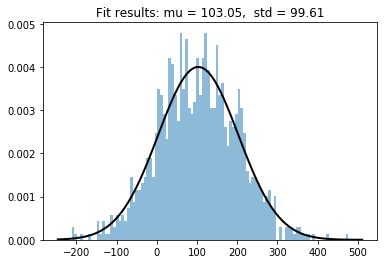

In [84]:
#визуальное сравнение с нормальным распределением

r = np.random.normal(100,100,1000)

mu, std = stats.norm.fit(r)

plt.hist(r, bins = 100, alpha = 0.5, density = True);

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [95]:
#критерий Shapiro-Wilk

p_sign, p_value = stats.shapiro(x)
print('P significance level is %.5f' %(p_sign))
print('P-value is %.5f' %(p_value))

P significance level is 0.95473
P-value is 0.00172


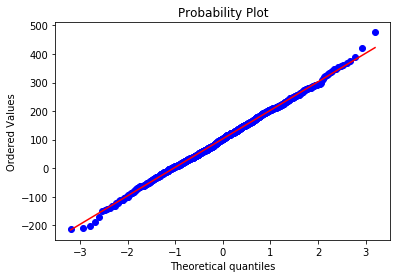

In [96]:
#qq plot

stats.probplot(r, dist="norm", plot=plt)
plt.show();

In [112]:
#U-тест Манна-Уинтни

#добавим выбросы
r[-1] = 1000000
x[0] = -1000000

p_value = stats.mannwhitneyu(r, x)[1]

print('P-value is %.5f' %(p_value))

P-value is 0.10850
